In [1]:
from textblob import TextBlob
#install modules
!pip install lyricsgenius
#!pip install -U gensim
!pip install gensim==3.8.3
!pip install -U spacy
!pip install textblob
!python -m textblob.download_corpora
!pip install rake-nltk

#import packages
from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000
import lyricsgenius
import pandas as pd
from textblob import TextBlob

     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 24.2MB 1.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 12.8MB 9.8MB/s 
     |████████████████████████████████| 460kB 44.9MB/s 
     |████████████████████████████████| 9.1MB 18.8MB/s 
     |████████████████████████████████| 1.1MB 19.5MB/s 
     |████████████████████████████████| 51kB 9.5MB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
     |████████████████████████████████| 122kB 57.0MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=e775844f04dd0b2ccbd025ac4cafd7489e400cd06ccd507f0b35327792d6f245
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
    

In [2]:
#define Genius API authentication
genius = lyricsgenius.Genius('Y98TmRsxVPIMhJm4z47BPxkzZGqbKBjbwN8Pgqdv0r76K3VITQGULjm8pnTSOHIB')
lyric_test = genius.search_song('Shake It Off', 'Taylor Swift').lyrics
print(lyric_test)

Searching for "Shake It Off" by Taylor Swift...
Done.
[Verse 1]
I stay out too late
Got nothing in my brain
That's what people say, mmm, mmm
That's what people say, mmm, mmm
I go on too many dates
But I can't make them stay
At least that's what people say, mmm, mmm
That's what people say, mmm, mmm

[Pre-Chorus 1]
But I keep cruisin'
Can't stop, won't stop movin'
It's like I got this music in my mind
Sayin' it's gonna be alright

[Chorus]
'Cause the players gonna play, play, play, play, play
And the haters gonna hate, hate, hate, hate, hate
Baby, I'm just gonna shake, shake, shake, shake, shake
I shake it off, I shake it off
Heartbreakers gonna break, break, break, break, break
And the fakers gonna fake, fake, fake, fake, fake
Baby, I'm just gonna shake, shake, shake, shake, shake
I shake it off, I shake it off

[Verse 2]
I never miss a beat
I'm lightning on my feet
And that's what they don’t see, mmm, mmm
That's what they don’t see, mmm, mmm
I'm dancin' on my own (Dancin' on my own)
I 

In [3]:
from google.colab import files
uploaded = files.upload()

Saving UK-Chart_Number1s_1952_2020_FYP.csv to UK-Chart_Number1s_1952_2020_FYP.csv


In [4]:
import io
#import UK Chart No.1s dataset
UK1s_df = pd.read_csv(io.BytesIO(uploaded['UK-Chart_Number1s_1952_2020_FYP.csv']))
# Dataset is now stored in a Pandas Dataframe
#UK1s_df.drop_duplicates(subset='Song title' and 'Artist(s)', inplace = True) #remove duplicate occurrences of songs
#UK1s_df = UK1s_df.head(40)
UK1s_df.reset_index()

,index,Index,Artist,Song_Title,Record_label,Week_ID,Year,Country,Weeks_at_number_one
0,0,1,Al Martino,"""Here in My Heart""",Capitol,14/11/1952,1952,AMERICA,9
1,1,2,Jo Stafford,"""You Belong to Me""",Columbia,16/01/1953,1953,UNITED KINGDOM,1
2,2,3,Kay Starr,"""Comes A-Long A-Love""",Capitol,23/01/1953,1953,AMERICA,1
3,3,4,Eddie Fisher,"""Outside of Heaven""",HMV,30/01/1953,1953,AMERICA,1
4,4,5,Perry Como,"""Don't Let the Stars Get in Your Eyes""",HMV,06/02/1953,1953,AMERICA,5
...,...,...,...,...,...,...,...,...,...
1355,1355,1356,Shawn Mendes and Camila Cabello,"""Señorita""","EMI, Syco",18/07/2019,2019,CANADA/CUBA,1
1356,1356,1357,Ed Sheeran featuring Khalid,"""Beautiful People""",Asylum,25/07/2019,2019,UNITED KINGDOM,1
1357,1357,1358,Ed Sheeran featuring Stormzy,"""Take Me Back to London""",Asylum,05/09/2019,2019,UNITED KINGDOM,5
1358,1358,1359,Tones and I,"""Dance Monkey""",Bad Batch,10/10/2019,2019,AUSTRALIA,11


In [5]:
#Function to return lyrics of each song using Genius API
def get_lyrics(title, artist):
  try:
    return genius.search_song(title, artist).lyrics
  except:
    return 'not found'
    
def get_lyric_sentiment(lyrics): 
  analysis = TextBlob(lyrics) 
  return analysis.sentiment.polarity
  
# # Function to preprocess text
# def preprocess(text):
#     # Create Doc object
#     doc = nlp(text, disable=['ner', 'parser'])
#     # Generate lemmas
#     lemmas = [token.lemma_ for token in doc]
#     # Remove stopwords and non-alphabetic characters
#     a_lemmas = [lemma for lemma in lemmas 
#             if lemma.isalpha() and lemma not in stopwords]
    
#     return ' '.join(a_lemmas)
    
# """Extract Keywords from text"""
# def return_keywords(texts):
#     xkeywords = []
#     values = keywords(text=preprocess(texts),split='\n',scores=True)
#     for x in values[:5]:
#         xkeywords.append(x[0])
#     try:
#         return xkeywords 
#     except:
#         return "no content"

In [6]:
#Use get_lyrics funcion to get lyrics for every song in dataset
lyrics = UK1s_df.apply(lambda row: get_lyrics(row['Song_Title'], row['Artist']), axis =1)
UK1s_df['Lyrics'] = lyrics
UK1s_df = UK1s_df.drop(UK1s_df[UK1s_df['Lyrics'] == 'not found'].index) #drop rows where lyrics are not found on Genius
UK1s_df

Searching for ""Here in My Heart"" by Al Martino...
Done.
Searching for ""You Belong to Me"" by Jo Stafford...
Done.
Searching for ""Comes A-Long A-Love"" by Kay Starr...
Done.
Searching for ""Outside of Heaven"" by Eddie Fisher...
Done.
Searching for ""Don't Let the Stars Get in Your Eyes"" by Perry Como...
Done.
Searching for ""She Wears Red Feathers"" by Guy Mitchell...
Done.
Searching for ""Broken Wings"" by The Stargazers...
Done.
Searching for ""(How Much Is) That Doggie in the Window?"" by Lita Roza...
Done.
Searching for ""I Believe"" by Frankie Laine...
Done.
Searching for ""I'm Walking Behind You"" by Eddie Fisher...
Done.
Searching for ""The Song from Moulin Rouge"" by Mantovani...
No results found for: '"The Song from Moulin Rouge" Mantovani'
Searching for ""Look At That Girl"" by Guy Mitchell...
Done.
Searching for ""Hey Joe"" by Frankie Laine...
Done.
Searching for ""Answer Me"" by David Whitfield...
Done.
Searching for ""Answer Me"" by Frankie Laine...
Done.
Searching fo

,Index,Artist,Song_Title,Record_label,Week_ID,Year,Country,Weeks_at_number_one,Lyrics
0,1,Al Martino,"""Here in My Heart""",Capitol,14/11/1952,1952,AMERICA,9,"Here in my heart I'm alone, I'm so lonely\nHer..."
1,2,Jo Stafford,"""You Belong to Me""",Columbia,16/01/1953,1953,UNITED KINGDOM,1,See the pyramids along the Nile\nWatch the sun...
2,3,Kay Starr,"""Comes A-Long A-Love""",Capitol,23/01/1953,1953,AMERICA,1,"The last tall son of Lot and Bellicent,\nAnd t..."
3,4,Eddie Fisher,"""Outside of Heaven""",HMV,30/01/1953,1953,AMERICA,1,I pass your house with misty eyes\nThere stand...
4,5,Perry Como,"""Don't Let the Stars Get in Your Eyes""",HMV,06/02/1953,1953,AMERICA,5,Don't let the stars get in your eyes\nDon't le...
...,...,...,...,...,...,...,...,...,...
1355,1356,Shawn Mendes and Camila Cabello,"""Señorita""","EMI, Syco",18/07/2019,2019,CANADA/CUBA,1,[Chorus: Camila Cabello]\nI love it when you c...
1356,1357,Ed Sheeran featuring Khalid,"""Beautiful People""",Asylum,25/07/2019,2019,UNITED KINGDOM,1,"[Intro: Ed Sheeran]\nWe are, we are, we are\nم..."
1357,1358,Ed Sheeran featuring Stormzy,"""Take Me Back to London""",Asylum,05/09/2019,2019,UNITED KINGDOM,5,[Chorus: Ed Sheeran & Stormzy]\nJet plane head...
1358,1359,Tones and I,"""Dance Monkey""",Bad Batch,10/10/2019,2019,AUSTRALIA,11,"[Verse 1]\nThey say, ""Oh my God, I see the way..."


In [7]:
#Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = UK1s_df.apply(lambda row: get_lyric_sentiment(row['Lyrics']), axis =1)
UK1s_df['Sentiment'] = sentiment
print(UK1s_df.columns.to_list())

['Index', 'Artist', 'Song_Title', 'Record_label', 'Week_ID', 'Year', 'Country', 'Weeks_at_number_one', 'Lyrics', 'Sentiment']


In [8]:
UK1s_df.head(20)

,Index,Artist,Song_Title,Record_label,Week_ID,Year,Country,Weeks_at_number_one,Lyrics,Sentiment
0,1,Al Martino,"""Here in My Heart""",Capitol,14/11/1952,1952,AMERICA,9,"Here in my heart I'm alone, I'm so lonely\nHer...",0.055000
1,2,Jo Stafford,"""You Belong to Me""",Columbia,16/01/1953,1953,UNITED KINGDOM,1,See the pyramids along the Nile\nWatch the sun...,0.214286
2,3,Kay Starr,"""Comes A-Long A-Love""",Capitol,23/01/1953,1953,AMERICA,1,"The last tall son of Lot and Bellicent,\nAnd t...",0.153604
3,4,Eddie Fisher,"""Outside of Heaven""",HMV,30/01/1953,1953,AMERICA,1,I pass your house with misty eyes\nThere stand...,0.195382
4,5,Perry Como,"""Don't Let the Stars Get in Your Eyes""",HMV,06/02/1953,1953,AMERICA,5,Don't let the stars get in your eyes\nDon't le...,0.489784
5,6,Guy Mitchell,"""She Wears Red Feathers""",Columbia,13/03/1953,1953,UNITED KINGDOM,4,(She wears red feathers and a hooly-hooly skir...,0.249237
6,7,The Stargazers,"""Broken Wings""",Decca,10/04/1953,1953,UNITED KINGDOM,1,"[Hook]\nNo more pencils, no more books\nI buil...",-0.074474
7,8,Lita Roza,"""(How Much Is) That Doggie in the Window?""",Decca,17/04/1953,1953,AMERICA,1,How much is that doggy in the window\n\nWoof w...,0.151136
8,9,Frankie Laine,"""I Believe""",Philips,24/04/1953,1953,AMERICA,9,I believe for every drop of rain that falls\nA...,0.259091
9,10,Eddie Fisher,"""I'm Walking Behind You""",HMV,26/06/1953,1953,AMERICA,1,I'm walking behind you on your wedding day\nAn...,-0.096364


In [9]:
UK1s_df.dtypes

Index                    int64
Artist                  object
Song_Title              object
Record_label            object
Week_ID                 object
Year                     int64
Country                 object
Weeks_at_number_one      int64
Lyrics                  object
Sentiment              float64
dtype: object

In [10]:
#Set the index of the dataframe to the WeekID. This sets us up to resample dataframe based on time
UK1s_df['Week_ID'] = pd.to_datetime(UK1s_df['Week_ID'],infer_datetime_format=True)
UK1s_df = UK1s_df.sort_values(by='Week_ID')
UK1s_df = UK1s_df.reset_index(drop=True)
UK1s_df = UK1s_df.set_index('Week_ID')

In [11]:
#Resample dataframe sentiment column by year. This arranges the mean lyric sentiment for every year
UK1s_resample = UK1s_df['Sentiment'].resample('y').mean()

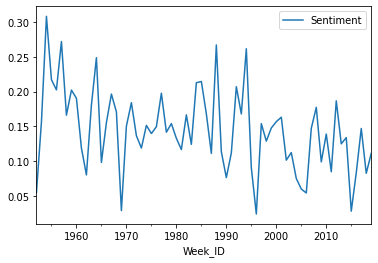

In [12]:
#Plot a line graph of lyric sentiment over time
UK1s_resample.plot(label='Sentiment', legend=True)

In [13]:
#Calculate the mean percentage change of lyric sentiment
UK1s_resample.pct_change().mean()

0.2537757864974681

In [14]:
#Resample daraframe lyrics by year. Get all the lyrics for every song for each year
lyrics_resample = UK1s_df['Lyrics'].resample('Y').sum()
lyrics_resample

Week_ID
1952-12-31    Here in my heart I'm alone, I'm so lonely\nHer...
1953-12-31    See the pyramids along the Nile\nWatch the sun...
1954-12-31    Oh, my pa-pa, to me he was so wonderful\nOh, m...
1955-12-31    Someone broke into my heart and stole a beat o...
1956-12-31    [Verse 1]\nSome people say a man is made out o...
                                    ...                        
2015-12-31    [Produced by Max Martin]\n\n[Verse 1]\nYou're ...
2016-12-31    [Music Video]\n\n[Verse 1]\nI thought that I'v...
2017-12-31    [Verse 1]\nThe club isn't the best place to fi...
2018-12-31    [Refrain: Ed Sheeran]\nIch bin ein Lügner gewe...
2019-12-31    [Intro]\nOh, she's sweet, but a psycho\nA litt...
Freq: A-DEC, Name: Lyrics, Length: 68, dtype: object

In [15]:
# #Use return_keywords function on lyrics_resample to get the top 20 keywords for each year
# lyric_keywords = [return_keywords(x[1]) for x in lyrics_resample.items()]

# #lyric_keywords = [return_keywords(x[1])]
# #lyric_keywords = ""
# #for x in lyrics_resample.items():
# #   #print(x)
# #if x != "0":
# #     #print(x)
# #lyric_keywords = lyric_keywords + str(x)
# #lyric_keywords = lyric_keywords.append(x)
#     #lyric_keywords = [return_keywords(x[1])]
# #lyrics_resample

# lyric_keywords

# #print(lyric_keywords)

# #UK1s_df['Year']

In [16]:
# #Put lyric_keywords into a DataFrame and include lyrics_resample and hot100_resample
# keywords_df = pd.DataFrame(lyric_keywords, columns = ['Keywords', 'Keywords', 'Keywords', 'Keywords', 'Keywords', 'Keywords', 'Keywords', 'Keywords', 'Keywords', 'Keywords'])
# #keywords_df = pd.DataFrame(lyric_keywords)
# #keywords_df = pd.DataFrame(list(lyric_keywords), columns = ['Keywords'])
# #keywords_df = keywords_df.head(62)
# keywords_df = keywords_df.set_index(lyrics_resample.index)
# keywords_df['Lyrics'] = lyrics_resample
# keywords_df['Sentiment'] = hot100_resample
# keywords_df

In [17]:
from google.colab import files
UK1s_df.to_csv('UK_Number1s_Lyrics_FYP.csv') 
files.download('UK_Number1s_Lyrics_FYP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>